In [1]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Handle table-like data and matrices
import numpy as np
import pandas as pd
import math 
# Modelling Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Modelling Helpers
from sklearn.preprocessing import Imputer , Normalizer , scale
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV

import keras
from keras import backend as K

# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

# Configure visualisations
%matplotlib inline
mpl.style.use( 'ggplot' )
sns.set_style( 'white' )
pylab.rcParams[ 'figure.figsize' ] = 8 , 6

Using TensorFlow backend.


In [421]:
train = pd.read_csv(r"F:\Kaggle\House Prices Advanced Regression Techniques\train.csv")
test = pd.read_csv(r"F:\Kaggle\House Prices Advanced Regression Techniques\test.csv")

In [3]:
df = train.copy()

In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df.shape

(1460, 81)

In [6]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


### All the features

In [8]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

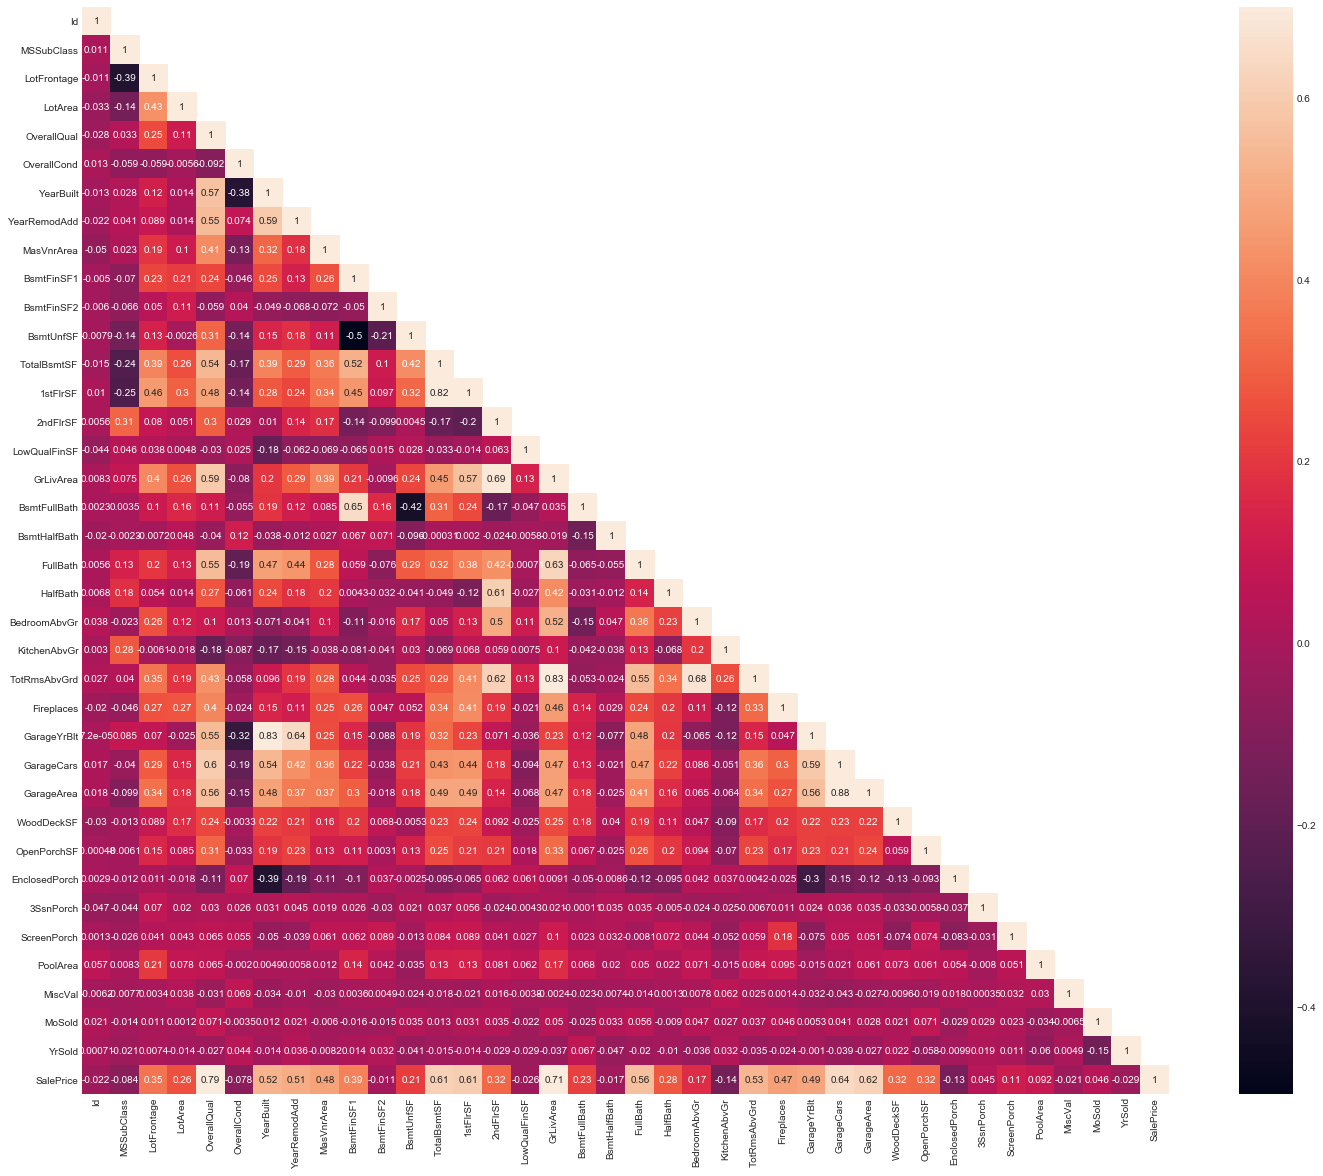

In [9]:
correlation_map = df[df.columns].corr()
obj = np.array(correlation_map)
obj[np.tril_indices_from(obj)] = False
fig,ax= plt.subplots()
fig.set_size_inches(25,20)
sns.heatmap(correlation_map, mask=obj,vmax=.7, square=True,annot=True)

In [10]:
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

### arr_null containg any column with null values

In [11]:
a = df.isnull().sum()
arr_null = []
idx = -1
for i in a:
    idx = idx + 1
    if i != 0:
        arr_null.append(df.columns[idx])
arr_null

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [12]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
newdf = df.select_dtypes(include=numerics)       #  numeric dataframe
objects = ['O']
df_o = df.select_dtypes(include=objects)

In [13]:
newdf.columns               #  numeric columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [14]:
df_o.columns                 #  categorical columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [15]:
arr_numeric = []
arr_categ = []
for i in arr_null:
    found = 0
    for j in newdf.columns:
        if i == j:
            found = 1
            arr_numeric.append(i)
            break
    if found == 0:
        arr_categ.append(i)

### arr_categ is having the categorical columns in the dataframe that are having null values .
### arr_numeric is having all the columns containg numeric values .

In [16]:
print(arr_categ)

['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


In [17]:
print(arr_numeric)

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']


In [18]:
df.MasVnrArea.fillna(df.MasVnrArea.mean() , inplace=True)

In [19]:
col_n = []
for i in df_o.columns:
    col_n.append(i + "_n")
    num = 0
    temp = []
    uni = []
    dic = {}
    for j in df[i]:
        found = 0
        for k in uni:
            if k == j:
                found = 1
                temp.append(dic[j])
                break
        if found != 1:
            uni.append(j)
            temp.append(num)
            dic.update( {j : num} )
            num = num + 1
    df[i + "_n"] = temp

In [20]:
col_n.append("SalePrice")

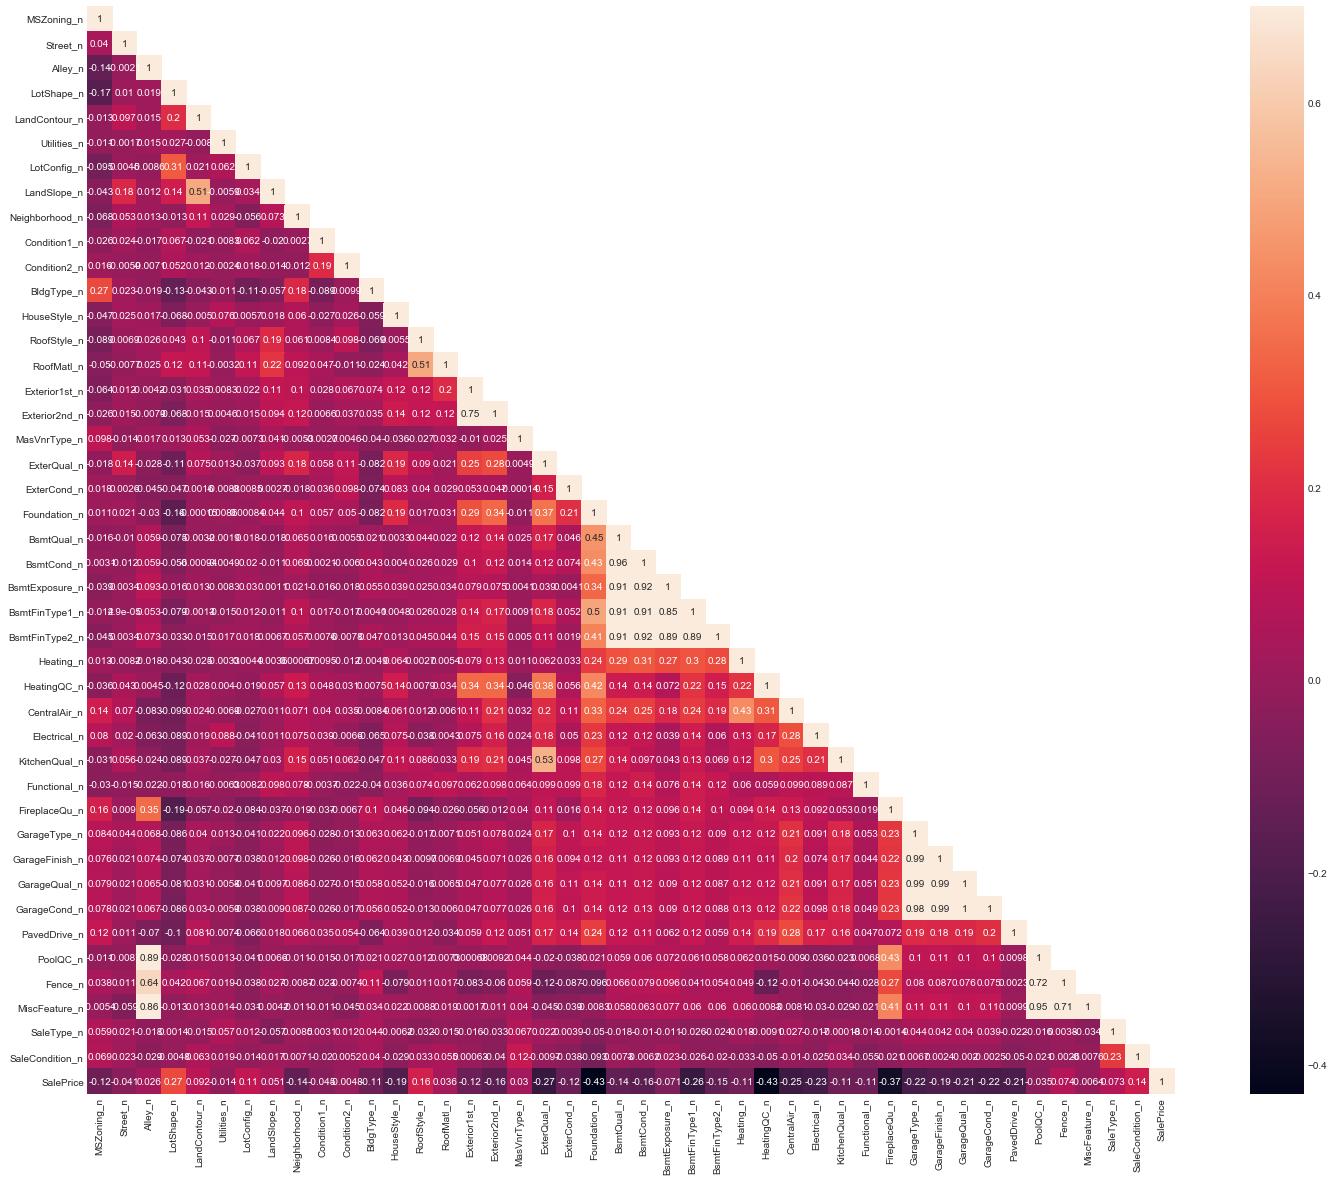

In [21]:
correlation_map = df[ col_n ] .corr()
obj = np.array(correlation_map)
obj[np.tril_indices_from(obj)] = False
fig,ax= plt.subplots()
fig.set_size_inches(27,20)
sns.heatmap(correlation_map, mask=obj,vmax=.7, square=True,annot=True)

df1 = df.dropna(subset = ["LotFrontage"] , axis = 0 , how = "any")
from sklearn import linear_model
reg = linear_model.Lasso(alpha = 0.1)
d = { "LotShape_n" : df1.LotShape_n , "BldgType_n" : df1.BldgType_n , 
      "SalePrice" : df1.SalePrice  , "GarageArea" : df1.GarageArea ,
    "LotArea" : df1.LotArea , "1stFlrSF" : df1["1stFlrSF"] , "TotalBsmtSF" : df1.TotalBsmtSF ,
     "GrLivArea" : df1.GrLivArea , "TotRmsAbvGrd" : df1.TotRmsAbvGrd }
    
X = pd.DataFrame(d)
y = df1.LotFrontage

reg = linear_model.LinearRegression()
reg.fit(X , y)
X_new = df.loc[df['LotFrontage'].isnull() , [ "LotShape_n" , "BldgType_n" , "SalePrice",
        "GarageArea" , "LotArea" , "1stFlrSF" , "TotalBsmtSF" , "GrLivArea" , "TotRmsAbvGrd"] ]

pred = reg.predict(X_new)

In [22]:
df.GarageYrBlt.fillna(df.YearBuilt , inplace = True)

In [23]:
df.drop(["Alley" , "Alley_n" , "MiscFeature" , "MiscFeature_n" , "PoolQC" , "PoolQC_n"] , axis=1 , inplace =True)

In [24]:
df.drop(["MasVnrType" , "MasVnrType_n"] , axis=1 , inplace = True)

In [25]:
df["BsmtQual"].value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [26]:
pd.crosstab([df.BsmtQual], [df.Foundation], margins=True).style.background_gradient(cmap='autumn_r')

Foundation,BrkTil,CBlock,PConc,Stone,Wood,All
BsmtQual,,,,,,
Ex,1,2,118,0,0,121
Fa,17,12,5,1,0,35
Gd,18,146,451,0,3,618
TA,109,465,70,5,0,649
All,145,625,644,6,3,1423


In [27]:
i = 0
for i in range(0 , len(np.array(df.BsmtQual))):
    if (df.loc[i , "BsmtQual"] != "TA" and df.loc[i , "BsmtQual"] != "Gd" and df.loc[i , "BsmtQual"] != "Ex" and df.loc[i , "BsmtQual"] != "Fa"):
        if df.loc[i , "Foundation"] == "PConc":
            df.loc[i , "BsmtQual"] = "Gd"
        else :
            df.loc[i , "BsmtQual"] = "TA"
    i = i+1

In [28]:
df.BsmtCond.value_counts()

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [29]:
df.BsmtCond.fillna(df.BsmtCond.mode() , inplace = True)

In [30]:
df.drop(["BsmtExposure" , "BsmtExposure_n" ]  , axis = 1 , inplace = True)

In [31]:
df.BsmtFinType2.value_counts()

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [32]:
df.BsmtFinType2.fillna(df.BsmtFinType2.mode() , inplace = True)

In [33]:
pd.crosstab([df.BsmtFinType1], [df.BsmtFinType2], margins=True).style.background_gradient(cmap='autumn_r')

BsmtFinType2,ALQ,BLQ,GLQ,LwQ,Rec,Unf,All
BsmtFinType1,,,,,,,
ALQ,0,15,2,15,22,166,220
BLQ,2,1,5,13,15,112,148
GLQ,4,2,0,10,9,392,417
LwQ,9,4,7,0,8,46,74
Rec,4,11,0,8,0,110,133
Unf,0,0,0,0,0,430,430
All,19,33,14,46,54,1256,1422


In [34]:
i= "BsmtFinType1"
num = 0
temp = []
uni = []
dic = {}
for j in df[i]:
    found = 0
    for k in uni:
        if k == j:
            found = 1
            temp.append(dic[j])
            break
    if found != 1:
        uni.append(j)
        temp.append(num)
        dic.update( {j : num} )
        num = num + 1

In [35]:
dic

{'GLQ': 0, 'ALQ': 1, 'Unf': 2, 'Rec': 3, 'BLQ': 4, nan: 42, 'LwQ': 6}

In [36]:
a = np.array(temp)
np.median(a)
print(list(dic.keys())[list(dic.values()).index(2)])

Unf


In [37]:
df.BsmtFinType1.fillna("Unf" , inplace = True)

In [38]:
df.Electrical.isnull().sum()

1

In [39]:
df.Electrical.value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [40]:
df.Electrical.fillna(df.Electrical.mode() , inplace = True)

In [41]:
df.FireplaceQu.value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [42]:
pd.crosstab([df.FireplaceQu], [ df.Foundation], margins=True).style.background_gradient(cmap='autumn_r')

Foundation,BrkTil,CBlock,PConc,Slab,Stone,All
FireplaceQu,,,,,,
Ex,1,2,20,1,0,24
Fa,1,25,7,0,0,33
Gd,42,113,221,2,2,380
Po,2,14,3,1,0,20
TA,12,145,153,3,0,313
All,58,299,404,7,2,770


In [43]:
i = 0
for i in range(0 , len(np.array(df.FireplaceQu))):
    if (df.loc[i , "FireplaceQu"] != "TA" and df.loc[i , "FireplaceQu"] != "Gd" and df.loc[i , "FireplaceQu"] != "Ex" and df.loc[i , "FireplaceQu"] != "Fa" and df.loc[i , "FireplaceQu"] != "Po"):
        if df.loc[i , "Foundation"] == "PConc" or df.loc[i , "Foundation"] == "BrkTil" :
            df.loc[i , "FireplaceQu"] = "Gd"
        else :
            df.loc[i , "FireplaceQu"] = "TA"
    i = i+1

In [44]:
df.GarageType.value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [45]:
pd.crosstab([df.GarageType], [ df.GarageFinish , df.GarageCond , df.GarageQual], margins=True).style.background_gradient(cmap='autumn_r')

In [46]:
i = 0
for i in range(0 , len(np.array(df.GarageType))):
    if (df.loc[i , "GarageType"] != "Attchd" and df.loc[i , "GarageType"] != "Detchd" and df.loc[i , "GarageType"] != "BuiltIn" 
        and df.loc[i , "GarageType"] != "Basment" and df.loc[i , "GarageType"] != "CarPort" and df.loc[i , "GarageType"] != "2Types"):
        
        if df.loc[i , "GarageFinish"] == "Unf" and df.loc[i , "GarageCond"] == "TA" and df.loc[i , "GarageQual"] == "TA":
            df.loc[i , "GarageType"] = "Detchd"
        else :
            df.loc[i , "GarageType"] = "Attchd"
    i = i+1

In [48]:
df.GarageQual.value_counts()

TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64

In [49]:
df.GarageQual.fillna(df.GarageQual.mode()[0] , inplace = True)

In [50]:
df.GarageCond.value_counts()

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

In [51]:
df.GarageCond.fillna(df.GarageCond.mode()[0] , inplace = True)

In [53]:
df.drop(["Fence" , "Fence_n"] , axis = 1 , inplace = True)

In [55]:
df.BsmtCond.value_counts()

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [56]:
df.BsmtCond.fillna(df.BsmtCond.mode()[0] , inplace = True)

In [58]:
df.BsmtFinType2.value_counts()

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [60]:
df.BsmtFinType2.fillna(df.BsmtFinType2.mode()[0] , inplace = True)

In [62]:
df.Electrical.value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [63]:
df.Electrical.fillna(df.Electrical.mode()[0] , inplace = True)

In [65]:
df.GarageFinish.value_counts()

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

In [66]:
pd.crosstab([df.GarageFinish], [ df.GarageType , df.GarageCond , df.GarageQual], margins=True).style.background_gradient(cmap='autumn_r')

In [67]:
df.GarageFinish.fillna(df.GarageFinish.mode()[0] , inplace = True)

In [541]:
from sklearn import linear_model
df2 = df.loc[df.LotFrontage.notnull() , newdf.columns ]
X = df2.drop("LotFrontage" , axis = 1)
y = df2.LotFrontage
reg_lf = linear_model.BayesianRidge(alpha_1 = 0.000000001 ,alpha_2 = 0.000000001 ,  n_iter = 5000 ,  normalize=True)
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.1)

In [542]:
reg_lf.fit(X_train , y_train)

BayesianRidge(alpha_1=1e-09, alpha_2=1e-09, compute_score=False, copy_X=True,
       fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=5000,
       normalize=True, tol=0.001, verbose=False)

In [543]:
X_new = df.loc[df.LotFrontage.isnull() , newdf.columns ]

In [544]:
pred = reg_lf.predict(X_test)

In [232]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, pred)

164.33924480207253

In [153]:
pred = reg.predict(X_new.drop("LotFrontage" , axis = 1)) 

In [154]:
pred

array([  75.2964465 ,   67.11871929,   72.56216214,   70.17939334,
         69.18018298,   70.58660024,   61.22202376,   69.4935382 ,
         64.50841338,   73.7865079 ,   93.49932686,   66.27100574,
         63.29351894,   64.84214978,   80.69413049,   70.16646669,
         63.50928713,   93.15827035,   70.63174307,   68.19274537,
         52.86624586,   73.79644697,   72.9208094 ,   73.69955709,
         70.74963286,   66.37270441,   79.26018852,   72.83240903,
         77.38867607,   80.16004848,   75.2038523 ,   67.8478741 ,
         80.77568645,   50.52335941,   66.67499898,   69.69620442,
         48.17053789,   72.47417549,   75.46133188,   66.34994825,
         70.93100544,   74.72791653,   71.90569491,   74.21559798,
         76.90801503,  128.24897929,   72.06429116,   66.90825642,
         68.97794422,   84.72461191,   67.07014015,   65.06613824,
         65.69984074,   73.17643599,   79.58845113,   78.94166815,
        116.86395611,   64.65571693,   61.16107626,   84.29149

In [186]:
df.LotFrontage.fillna(-1 , inplace = True)

In [198]:
j = 0
for i in range(0 , 1460):
    if df.loc[i , "LotFrontage"] == -1:
        df.loc[i , "LotFrontage"] = pred[j]
        j = j + 1

In [422]:
test.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       227
LotArea             0
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         16
MasVnrArea         15
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         1
TotRmsAbvGrd        0
Functional          2
Fireplaces          0
FireplaceQu       730
GarageType         76
GarageYrBlt        78
GarageFinish       78
GarageCars          1
GarageArea          1
GarageQual         78
GarageCond

In [423]:
test.MasVnrArea.fillna(test.MasVnrArea.mean() , inplace=True)

In [424]:
test.GarageYrBlt.fillna(test.YearBuilt , inplace = True)

In [430]:
testcol_n = []
for i in df_o.columns:
    testcol_n.append(i + "_n")
    num = 0
    temp = []
    uni = []
    dic = {}
    for j in test[i]:
        found = 0
        for k in uni:
            if k == j:
                found = 1
                temp.append(dic[j])
                break
        if found != 1:
            uni.append(j)
            temp.append(num)
            dic.update( {j : num} )
            num = num + 1
    test[i + "_n"] = temp

In [433]:
test.drop(["Alley" , "Alley_n" , "MiscFeature" , "MiscFeature_n" , "PoolQC" , "PoolQC_n"] , axis=1 , inplace =True)

In [434]:
test.drop(["MasVnrType" , "MasVnrType_n"] , axis=1 , inplace = True)

In [438]:
i = 0
for i in range(0 , len(np.array(test.BsmtQual))):
    if (test.loc[i , "BsmtQual"] != "TA" and test.loc[i , "BsmtQual"] != "Gd" and test.loc[i , "BsmtQual"] != "Ex" and test.loc[i , "BsmtQual"] != "Fa"):
        if test.loc[i , "Foundation"] == "PConc":
            test.loc[i , "BsmtQual"] = "Gd"
        else :
            test.loc[i , "BsmtQual"] = "TA"
    i = i+1

In [440]:
test.BsmtCond.fillna(test.BsmtCond.mode() , inplace = True)

In [441]:
test.drop(["BsmtExposure" , "BsmtExposure_n" ]  , axis = 1 , inplace = True)

In [444]:
test.BsmtFinType2.fillna(test.BsmtFinType2.mode() , inplace = True)

In [445]:
pd.crosstab([test.BsmtFinType1], [test.BsmtFinType2], margins=True).style.background_gradient(cmap='autumn_r')

BsmtFinType2,ALQ,BLQ,GLQ,LwQ,Rec,Unf,All
BsmtFinType1,,,,,,,
ALQ,0,15,1,12,14,167,209
BLQ,2,0,5,10,19,85,121
GLQ,11,5,0,7,10,398,431
LwQ,5,7,7,0,8,53,80
Rec,15,8,7,12,0,113,155
Unf,0,0,0,0,0,421,421
All,33,35,20,41,51,1237,1417


In [446]:
i= "BsmtFinType1"
num = 0
temp = []
uni = []
dic = {}
for j in test[i]:
    found = 0
    for k in uni:
        if k == j:
            found = 1
            temp.append(dic[j])
            break
    if found != 1:
        uni.append(j)
        temp.append(num)
        dic.update( {j : num} )
        num = num + 1

In [447]:
dic

{'Rec': 0, 'ALQ': 1, 'GLQ': 2, 'Unf': 3, 'BLQ': 4, 'LwQ': 5, nan: 47}

In [448]:
a = np.array(temp)
np.median(a)
print(list(dic.keys())[list(dic.values()).index(2)])

GLQ


In [449]:
test.BsmtFinType1.fillna("GLQ" , inplace = True)

In [453]:
i = 0
for i in range(0 , len(np.array(test.FireplaceQu))):
    if (test.loc[i , "FireplaceQu"] != "TA" and test.loc[i , "FireplaceQu"] != "Gd" and test.loc[i , "FireplaceQu"] != "Ex" and test.loc[i , "FireplaceQu"] != "Fa" and test.loc[i , "FireplaceQu"] != "Po"):
        if test.loc[i , "Foundation"] == "PConc" or test.loc[i , "Foundation"] == "BrkTil" :
            test.loc[i , "FireplaceQu"] = "Gd"
        else :
            test.loc[i , "FireplaceQu"] = "TA"
    i = i+1

In [456]:
i = 0
for i in range(0 , len(np.array(test.GarageType))):
    if (test.loc[i , "GarageType"] != "Attchd" and test.loc[i , "GarageType"] != "Detchd" and test.loc[i , "GarageType"] != "BuiltIn" 
        and test.loc[i , "GarageType"] != "Basment" and test.loc[i , "GarageType"] != "CarPort" and test.loc[i , "GarageType"] != "2Types"):
        
        if test.loc[i , "GarageFinish"] == "Unf" and test.loc[i , "GarageCond"] == "TA" and test.loc[i , "GarageQual"] == "TA":
            test.loc[i , "GarageType"] = "Detchd"
        else :
            test.loc[i , "GarageType"] = "Attchd"
    i = i+1

In [459]:
test.GarageQual.fillna(test.GarageQual.mode()[0] , inplace = True)

In [461]:
test.GarageCond.fillna(test.GarageCond.mode()[0] , inplace = True)

In [462]:
test.drop(["Fence" , "Fence_n"] , axis = 1 , inplace = True)

In [463]:
test.BsmtCond.fillna(test.BsmtCond.mode()[0] , inplace = True)

In [464]:
test.BsmtFinType2.fillna(test.BsmtFinType2.mode()[0] , inplace = True)

In [465]:
test.Electrical.fillna(test.Electrical.mode()[0] , inplace = True)

In [466]:
test.GarageFinish.fillna(test.GarageFinish.mode()[0] , inplace = True)

In [503]:
test.BsmtFinSF1.fillna(test.BsmtFinSF1.mode()[0] , inplace = True)

In [505]:
test.BsmtFinSF2.fillna(test.BsmtFinSF2.mode()[0] , inplace = True)

In [507]:
test.BsmtUnfSF.fillna(test.BsmtUnfSF.mode()[0] , inplace = True)

In [509]:
test.TotalBsmtSF.fillna(test.TotalBsmtSF.mean() , inplace = True)

In [534]:
test.BsmtFullBath.fillna(test.BsmtFullBath.mode()[0] , inplace = True)

In [513]:
test.BsmtHalfBath.fillna(test.BsmtHalfBath.mode()[0] , inplace = True)

In [517]:
test.KitchenQual.fillna(test.KitchenQual.mode()[0] , inplace = True)

In [519]:
test.Functional.fillna(test.Functional.mode()[0] , inplace = True)

In [521]:
test.GarageCars.fillna(test.GarageCars.mode()[0] , inplace = True)

In [524]:
test.GarageArea.fillna(test.GarageArea.mode()[0] , inplace = True)

In [526]:
test.SaleType.fillna(test.SaleType.mode()[0] , inplace = True)

In [531]:
test.Exterior1st.fillna(test.SaleType.mode()[0] , inplace = True)
test.Exterior2nd.fillna(test.SaleType.mode()[0] , inplace = True)

In [567]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
t_N = test.select_dtypes(include=numerics)       #  numeric dataframe
objects = ['O']
t_C = test.select_dtypes(include=objects)

In [654]:
from sklearn import linear_model
t = test.loc[test.LotFrontage.notnull() , t_N.columns ]
X = t.drop(["LotFrontage"], axis = 1)
y = t.LotFrontage
reg = linear_model.Lasso(alpha = 0.1)
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.1)

In [655]:
reg.fit(X_train , y_train)
test_pred_lf = reg.predict(X_test)

In [656]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, test_pred_lf)

197.07848214474805

In [657]:
X_new_test = test.loc[test.LotFrontage.isnull() , t_N.columns ]
X_new_test = X_new_test.drop("LotFrontage" , axis = 1)

In [658]:
test_pred_lf = reg.predict(X_new_test)

In [661]:
test.LotFrontage.fillna(-1 , inplace = True)

In [664]:
j = 0
for i in range(0 , 1459):
    if test.loc[i , "LotFrontage"] == -1:
        test.loc[i , "LotFrontage"] = pred[j]
        j = j + 1

In [225]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
N = df.select_dtypes(include=numerics)       #  numeric dataframe
objects = ['O']
C = df.select_dtypes(include=objects)

In [690]:
from sklearn import preprocessing
normalizer = preprocessing.Normalizer().fit(df.loc[: , N.columns])

In [691]:
normalizer

Normalizer(copy=True, norm='l2')

In [692]:
mat = normalizer.transform(df.loc[: , N.columns])

In [693]:
mat

array([[  4.79101574e-06,   2.87460944e-04,   4.04840830e-02, ...,
          0.00000000e+00,   0.00000000e+00,   3.11416023e-04],
       [  1.10002624e-05,   1.10002624e-04,   5.28012594e-02, ...,
          0.00000000e+00,   0.00000000e+00,   4.40010495e-04],
       [  1.34028345e-05,   2.68056690e-04,   5.02606293e-02, ...,
          0.00000000e+00,   0.00000000e+00,   3.03797581e-04],
       ..., 
       [  5.46644949e-03,   2.62449564e-04,   3.39009851e-02, ...,
          0.00000000e+00,   0.00000000e+00,   2.47452446e-04],
       [  1.02359049e-02,   1.40313981e-04,   6.81715477e-02, ...,
          0.00000000e+00,   0.00000000e+00,   4.77067535e-04],
       [  9.87041447e-03,   1.35211157e-04,   6.71796634e-02, ...,
          0.00000000e+00,   0.00000000e+00,   5.07041839e-04]])

In [694]:
mat.shape

(1460, 75)

In [695]:
matc = mat

### SalePrice column removed from matrix

In [696]:
matc = np.delete(matc , 36 , 1)

In [706]:
from sklearn import linear_model
reg = linear_model.RidgeCV(cv = 100)
X_train , X_test , y_train , y_test = train_test_split(matc , mat[: , 36] , test_size = 0.2)
reg.fit(X_train , y_train)

RidgeCV(alphas=(0.1, 1.0, 10.0), cv=100, fit_intercept=True, gcv_mode=None,
    normalize=False, scoring=None, store_cv_values=False)

In [707]:
pred = reg.predict(X_test)

In [708]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, pred)

2.1069822496606935e-06

### Normalized SalePrice values predicted 

In [709]:
pred

array([ 0.99844804,  0.99773226,  0.99376663,  0.98825759,  0.99593278,
        1.00206936,  0.99946432,  1.00077785,  1.00270825,  0.99548133,
        0.99870898,  0.99822574,  0.99814624,  0.99404867,  0.99774009,
        0.99830708,  0.99765222,  0.99716465,  0.99889269,  0.99545139,
        0.99564837,  0.9938144 ,  0.99141718,  0.99923996,  0.99771509,
        0.99849287,  0.99797678,  0.98931217,  0.99655523,  0.99688508,
        0.99345504,  1.00152245,  0.99962156,  0.99300775,  0.9996715 ,
        0.9948238 ,  0.99884095,  0.99668819,  1.00314599,  0.99826654,
        0.99560055,  1.00136221,  0.99948386,  0.99822634,  0.99656293,
        0.99938597,  0.98901239,  0.99754839,  0.99728037,  0.99801856,
        0.99558031,  0.99868319,  0.99890665,  1.00259501,  1.00241174,
        1.00157029,  0.99302728,  0.99508309,  1.00131492,  0.9924762 ,
        0.99470875,  0.9961523 ,  0.99339701,  0.99644149,  1.00226075,
        0.99730782,  0.99573726,  0.99316182,  0.99713419,  0.99